# Original Model Multiplier-Accelerator (Damped Harmonic Oscillator) 

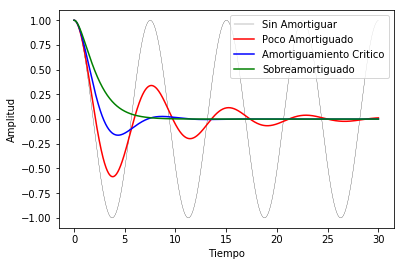

In [80]:
from scipy.integrate import odeint
import numpy as np
import math
from matplotlib import pyplot as plt

# ====== Parametros ======
# La ecuacion original Y'' - (v - 1- s)Y + sY = 0
# Tiene parametros: m = 1, b = -v + 1 + s y k = s
# Por lo que tenemos que definir v y s
# ========================

def dy(y, t, v, s, zeta_opt = None):
    k = s
    b = 1 + s - v
    w0 = math.sqrt(k)
    zeta = b / (2*math.sqrt(k))
    if(zeta_opt != None):
        zeta = zeta_opt
    x, p = y[0], y[1]
    dx = p
    dp = -zeta * w0 * p - w0**2 * x
    return [dx, dp]

y0 = [1.0, 0.0]
t = np.linspace(0, 30, 1000)
s = 0.7

# Sin amortiguar, entonces v = 1 + s
v_h = 1 + s
y1 = odeint(dy, y0, t, args = (v_h,s))
# Poco Amortiguado, entonces v 
v_p = (1+s)/1.5 #Define la razón del amortiguamiento.
y2 = odeint(dy, y0, t, args = (v_p,s))

# Amortiguamiento critico. No hay oscilación.
v_c = 1 + s - 2*math.sqrt(s)
y3 = odeint(dy, y0, t, args = (v_c,s))

# Sobre amortiguada.
v_o =  max((1 + s - 2*math.sqrt(s)), 20*s*(1 + s - 2*math.sqrt(s)), -20*s*(1 + s - 2*math.sqrt(s)))
y4 = odeint(dy, y0, t, args = (v_o,s, 2))

fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="Sin Amortiguar", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Poco Amortiguado")
ax.plot(t, y3[:,0], 'b', label="Amortiguamiento Critico")
ax.plot(t, y4[:,0], 'g', label="Sobreamortiguado")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")
ax.legend()

plt.show()

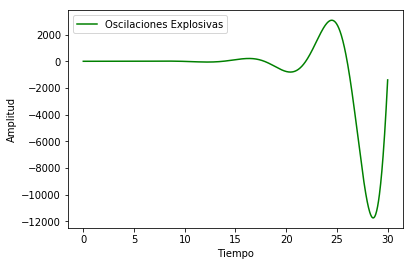

In [86]:
v_e = 2*s**(3/2)+2.2*math.sqrt(s)
y5 = odeint(dy, y0, t, args=(v_e, s))
fig, ax = plt.subplots()
ax.plot(t, y5[:,0], 'g', label="Oscilaciones Explosivas")
ax.legend()
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")
plt.show()

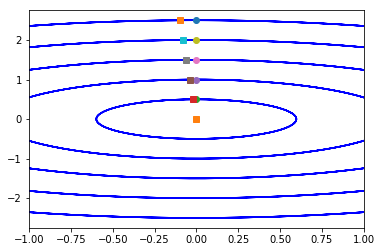

In [87]:
for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(dy, y0, t, args=(v_h,s))
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
plt.xlim([-1, 1])
plt.show()

# Función de Inversión No Lineal (Oscilador de Van Der Pol)

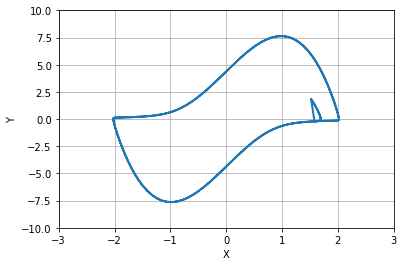

In [71]:
import numpy as np
import matplotlib.pyplot as py
from scipy.integrate import odeint
from matplotlib import animation, rc
from IPython.display import HTML
mu = 5.0
X0 = [1.5, 2.0]
def vanderpol(X, t, mu=mu):
    x = X[0]
    y = X[1]
    dxdt = y
    dydt = mu * (1.0 - x**2) * y - x
    return np.array([dxdt, dydt])
def solve(X0, tstart=0, tend=12.6, tnum=1000):
    t = np.linspace(tstart, tend, tnum)
    sol = odeint(vanderpol, X0, t)
    x = sol[:, 0]
    y = sol[:, 1]
    return [x, y, t]
[x, y, t] = solve(X0)
fig = py.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-10, 10))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()
line, = ax.plot([], [], '-', lw=2)
def init():
    line.set_data([], [])
    return line,
thisx = []
thisy = []
def animate(i):
    thisx.append(x[i])
    thisy.append(y[i])

    line.set_data(thisx, thisy)
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)
ani.save('vanderpol.mp4',writer='ffmpeg',extra_args=['-loglevel','verbose'])#You will run into problems if you don't have proper codecs installed,use debugging loglevel etc..

HTML(ani.to_html5_video())

# Caos en la pequeña economia bajo fuerza de la Economia Mundial

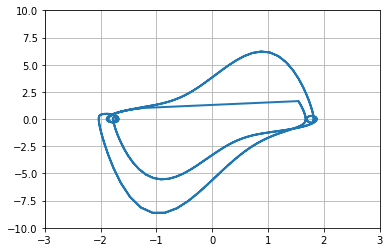

In [74]:
import numpy as np
import matplotlib.pyplot as py
from scipy.integrate import odeint
from matplotlib import animation, rc
from IPython.display import HTML
mu = 5.0
X0 = [1.5, 2.0]
def vanderpol(X, t, mu=mu):
    x = X[0]
    y = X[1]
    dxdt = y
    dydt = mu * (1.0 - x**2) * y - x - 5*np.sin(2.457*t)
    return np.array([dxdt, dydt])
def solve(X0, tstart=0, tend=12.6, tnum=500):
    t = np.linspace(tstart, tend, tnum)
    sol = odeint(vanderpol, X0, t)
    x = sol[:, 0]
    y = sol[:, 1]
    return [x, y, t]
[x, y, t] = solve(X0)
fig = py.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-10, 10))
ax.grid()
line, = ax.plot([], [], '-', lw=2)


def init():
    line.set_data([], [])
    return line,

thisx = []
thisy = []


def animate(i):
    thisx.append(x[i])
    thisy.append(y[i])
    line.set_data(thisx, thisy)
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)
ani.save('vanderpol_caos.mp4',writer='ffmpeg',extra_args=['-loglevel','verbose'])#You will run into problems if you don't have proper codecs installed,use debugging loglevel etc..
HTML(ani.to_html5_video())